In [1]:
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import itertools

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
D1TV = 0
D2TV = 1
D3TV = 2
D4TV = 3
D1BV = 4
D2BV = 5
D3BV = 6
D4BV = 7

In [4]:
#general function for ray and singleray    
def runRaytracer(radius, src_z, trg_z, extra_args = ""): 
    """ Format coordinates into string, run string with subprocess, parse output, return float. """
    cmdRaytracer = "/home/mbamass/ARA/radiosplineNew/radiospline/build/radiospline-prefix/src/radiospline-build/./ray -a --" 
    cmdRaytracer += " %f %f %f " % (radius,src_z,trg_z)
    cmdRaytracer += extra_args 
    cmdRaytracer_output = subprocess.check_output([cmdRaytracer], shell = True)
    Output = cmdRaytracer_output.split("\n") 
        
    try: 
            return float(Output[0].split()[0])

    except ValueError:
        return -1


In [54]:

antDepthTV = [-165.46,-164.67,-161.34,-147.93] 
antDepthBV = [-195.31,194.52,-191.28,-177.72]
calDepth = -173.74
delay = {(D1TV,D2TV):1.75,(D1TV,D3TV):176.25, (D1TV,D4TV):121.25,(D1TV,D1BV):-24.75,(D1TV,D2BV):-20.75,(D1TV,D3BV):161.25,(D1TV,D4BV):161.5,
        (D2TV,D3TV):174.25,(D2TV,D4TV):119.25, (D2TV,D1BV):-26.75,(D2TV,D2BV):-22.75,(D2TV,D3BV):159.25,(D2TV,D4BV):159.75,
        (D3TV,D4TV):-55.25, (D3TV,D1BV):-201.26,(D3TV,D2BV):-196.75,(D3TV,D3BV):-14.91,(D3TV,D4BV):-14.75,
        (D4TV,D1BV):-146.25,(D4TV,D2BV):-141.75,(D4TV,D3BV):41.75,(D4TV,D4BV):40.25,
        (D1BV,D2BV):4.25,(D1BV,D3BV):185.75,(D1BV,D4BV):186.25,
        (D2BV,D3BV):181.75,(D2BV,D4BV):182.75,
        (D3BV,D4BV):0.25}

In [21]:
delay[(0,2)]

176.25

In [47]:
pairs = list(itertools.combinations((D3TV,D4TV,D3BV,D4BV), 2))
print pairs

[(2, 3), (2, 6), (2, 7), (3, 6), (3, 7), (6, 7)]


In [38]:
D1 = np.linspace(50,80,num=80) #D1
D2 = np.linspace(50,80,num=80) #D2
D3 = np.linspace(20,50,num=80) #D3
D4 = np.linspace(20,50,num=80) #D4

In [39]:
timeD1TV = [ runRaytracer(x,calDepth,antDepthTV[0]) for x in D3 ]
timeD1BV = [ runRaytracer(x,calDepth,antDepthBV[0]) for x in D3 ]
timeD2TV = [ runRaytracer(x,calDepth,antDepthTV[1]) for x in D4 ]
timeD2BV = [ runRaytracer(x,calDepth,antDepthBV[1]) for x in D4 ]
timeD3TV = [ runRaytracer(x,calDepth,antDepthTV[2]) for x in D3 ]
timeD3BV = [ runRaytracer(x,calDepth,antDepthBV[2]) for x in D3 ]
timeD4TV = [ runRaytracer(x,calDepth,antDepthTV[3]) for x in D4 ]
timeD4BV = [ runRaytracer(x,calDepth,antDepthBV[3]) for x in D4 ]

In [90]:
def constructChi2(D3,D4,D1,antDepthTV, antDepthBV, calDepth,delay):
    chi2Total = []
    #pairs = list(itertools.combinations((D1TV,D3TV,D4TV,D1BV,D3BV,D4BV), 2))
    pairs = list(itertools.combinations((D3TV,D4TV,D3BV,D4BV), 2))
    #pairs = [(D3TV,D4BV),(D3BV,D4TV)]
    count = 0
    for k in range(len(D1)):
        chi2D3D4 = []
        tTD1 = timeD1TV[k]
        tBD1 = timeD1BV[k]
        for i in range(len(D3)):
            tTD3 = timeD3TV[i]
            tBD3 = timeD3BV[i]
            #print t1, t2
            chiD4 = []
            for j in range(len(D4)):
                chiSq = 0.0
                time = {D1TV:tTD1,D1BV:tBD1,D3TV:tTD3,D3BV:tBD3,D4TV:timeD4TV[j],D4BV:timeD4BV[j]}
                for pair in pairs:
                    #if pair != (0,2): continue
                    time1 = time[pair[0]]
                    time2 = time[pair[1]]
                    #print pair
                    chiSq += chiSquare(delay[pair],time1-time2)
                    #print chiSq
                chiD4.append(chiSq)
            chi2D3D4.append(chiD4)
        chi2Total.append(chi2D3D4)
    print count
    return chi2Total
            


In [91]:
def chiSquare(true, expected):
    return ((expected-true)*(expected-true)/true)

In [92]:
chi2 = constructChi2(D3,D4,D1,antDepthTV,antDepthBV,calDepth,delay)

0


In [93]:
chi2 = np.array(chi2)

In [94]:
numpy.unravel_index(chi2.argmin(), chi2.shape)

(0, 59, 68)

In [53]:
print chi2[0][71][79]

40.9166622853


In [95]:
print D3[59],D4[68]

42.4050632911 45.8227848101


/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


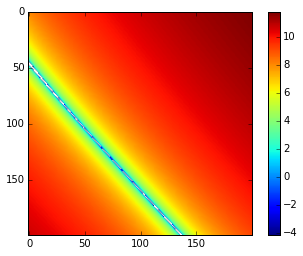

In [95]:
plt.imshow(log(chi2));
plt.colorbar()
plt.show()

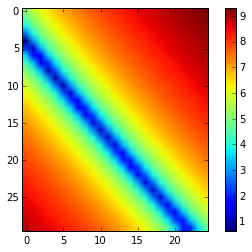

In [69]:
plt.imshow(log(interesting + 4));
plt.colorbar(cmap='viridis')
plt.show()

In [33]:
numpy.unravel_index(chi2.argmin(), chi2.shape)

(79, 12, 0)

In [36]:
print D1[79],D3[12]

80.0 24.5569620253


In [37]:
chi2[79][12][0]

120.29703194573345

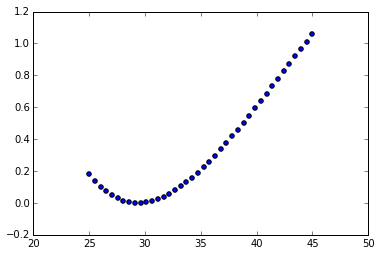

In [12]:
plt.scatter(R1,ch2)

In [38]:
n = 10000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xedges, yedges = np.linspace(-4, 4, 42), np.linspace(-25, 25, 42

In [40]:
x.shape

(10000,)

In [41]:
hist, xedges, yedges = np.histogram2d(x, y, (xedges, yedges))
xidx = np.clip(np.digitize(x, xedges), 0, hist.shape[0]-1)
yidx = np.clip(np.digitize(y, yedges), 0, hist.shape[1]-1)
c = hist[xidx, yidx]

In [42]:
c.shape

(10000,)

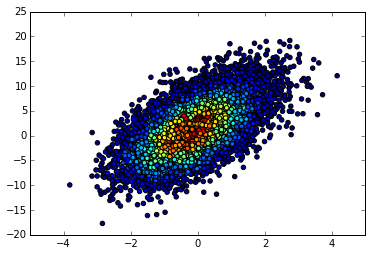